In [ ]:
!git clone https://github.com/hammad93/hurricane-net.git

fatal: destination path 'hurricane-net' already exists and is not an empty directory.


In [ ]:
%cd hurricane-net/docs/data

/content/hurricane-net/docs/data


In [ ]:
import hurdat2
import requests
import pandas as pd

hurdat_2023_url ='https://www.nhc.noaa.gov/data/hurdat/hurdat2-1851-2023-051124.txt'
with open('hurdat2_2023.txt', 'wb') as f:
    f.write(requests.get(hurdat_2023_url).content)

In [ ]:
hurdat_2023 = hurdat2.hurdat2(filename='hurdat2_2023.txt')
storms = hurdat_2023.hurricanes

In [ ]:
 # convert to mph
storms['max_wind_mph'] = round(pd.to_numeric(storms['max_wind']) * 1.150779, 2)

# get the max wind speed for each storm in 2023
df = storms[storms['entry_time'] >= '2023'].sort_values(by='max_wind_mph', ascending=False).drop_duplicates(subset='storm_id', keep='first')

In [ ]:
# top 5 max wind speed per storm results with only relevant columns
wind_result = df[['storm_name', 'max_wind_mph', 'entry_time']].reset_index()
wind_result.head()

,index,storm_name,max_wind_mph,entry_time
0,54443,LEE,166.86,2023-09-08 06:00:00
1,54237,FRANKLIN,149.60,2023-08-29 00:00:00
2,54311,IDALIA,132.34,2023-08-30 09:00:00
3,54717,TAMMY,109.32,2023-10-25 12:00:00
4,54551,NIGEL,97.82,2023-09-19 18:00:00


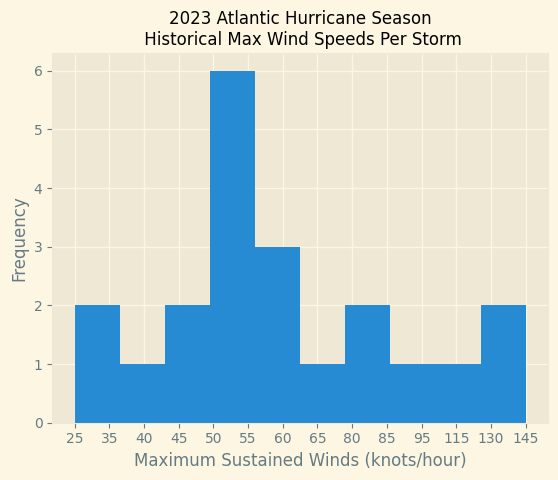

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
hist = df.sort_values(by='max_wind_mph')['max_wind'].hist(bins=10)

# Adding title and labels
plt.title('2023 Atlantic Hurricane Season\n Historical Max Wind Speed Per Storm', fontsize=12)
plt.xlabel('Maximum Sustained Winds (knots/hour)')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

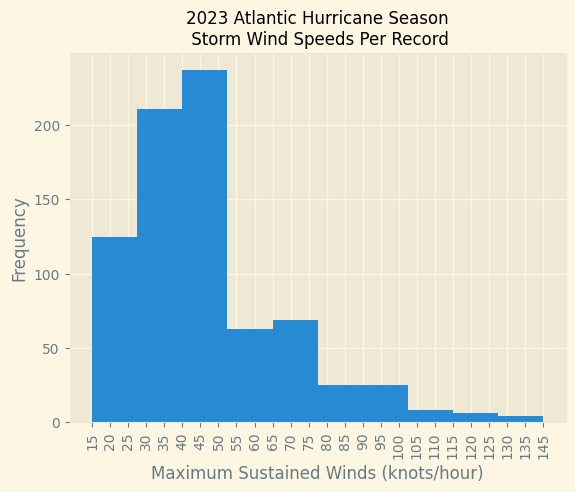

In [ ]:
hist = storms[storms['entry_time'] >= '2023'].sort_values(by='max_wind_mph')['max_wind'].hist()
# Adding title and labels
plt.title('2023 Atlantic Hurricane Season\n Wind Speed Per Storm Record', fontsize=12)
plt.xlabel('Maximum Sustained Winds (knots/hour)')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Display the histogram
plt.show()